# Pasiphae field grid tests

In this notebook we test the field grid setup for the Pasiphae survey. We use the `fieldgrid` module to create and test the grids. The module was developed in the notebook `Develop_FieldGrid.ipynb`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.coordinates import Angle
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

import fieldgrid
import visualizations as vis

## Tilted great circle grid

### Demonstration

We start with a great circle grid:

In [3]:
fov = Angle(10. * u.deg)
overlap = Angle(2. * u.deg)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-90. * u.deg)
dec_lim_strict = True
gal_lat_lim = Angle(0. * u.deg)
gal_lat_lim_strict = True
frame_rot_dec = Angle(0. * u.deg)
frame_rot_ra = Angle(0. * u.deg)
verbose = 2

grid = fieldgrid.FieldGridGrtCirc(
        fov.rad, overlap=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, dec_lim_south=dec_lim_south.rad,
        dec_lim_strict=dec_lim_strict, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        frame_rot_ra=frame_rot_ra.rad, frame_rot_dec=frame_rot_dec.rad, verbose=verbose)

Create fields..
  Calculate field centers..
    Number of RA half circles: 45
    Number of declinations: 23
  Calculate field corners..
    Done                                                    
  Apply declination limits..
    Dec. lim. North: none
    Dec. lim. South: none
    Fields removed:        0
    Fields remaining:   1035
Final number of fields: 1035


In [4]:
visualizer = vis.FieldGridVisualizer()

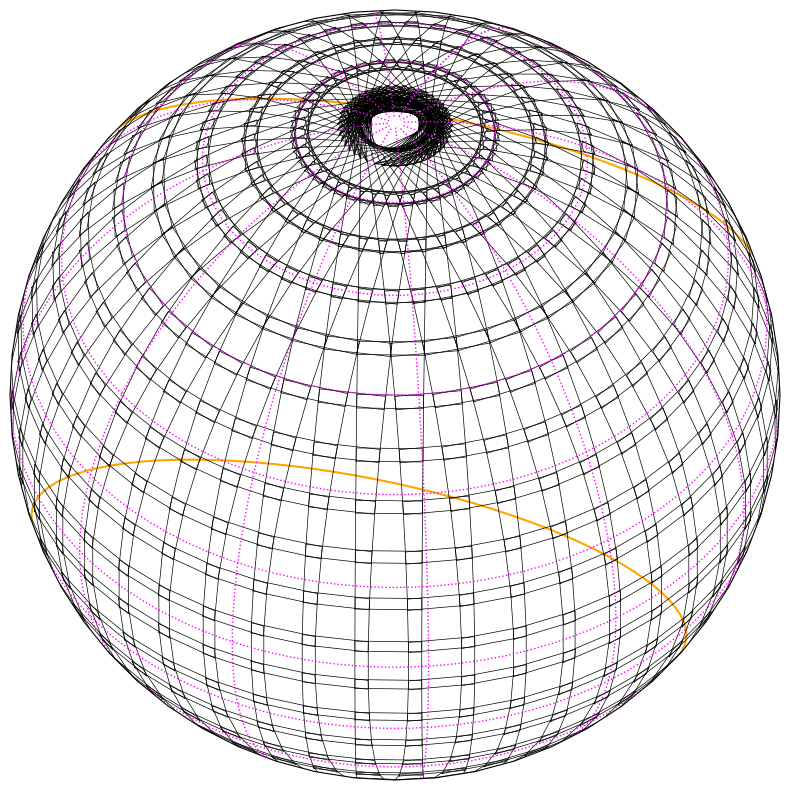

In [5]:
visualizer.orthographic(grid, b_lim=np.radians(30), outlines=True);

There is a lot of redudant overlap of fields the closer we get to the poles.
Next we rotate this grid such that the overlapping poles are moved into the Galactic plane, which we will discard:

In [6]:
fov = Angle(10. * u.deg)
overlap = Angle(2. * u.deg)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-25. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
frame_rot_dec = Angle(90. * u.deg)
frame_rot_ra = Angle(110. * u.deg)
verbose = 2

grid = fieldgrid.FieldGridGrtCirc(
        fov.rad, overlap=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, dec_lim_south=dec_lim_south.rad,
        gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        frame_rot_ra=frame_rot_ra.rad, frame_rot_dec=frame_rot_dec.rad, verbose=verbose)

Create fields..
  Calculate field centers..
    Number of RA half circles: 45
    Number of declinations: 23
    Rotate frame by 90.0 deg in declination
    Rotate frame by 110.0 deg in RA
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
    Galactic latitude limit: +/-30.0 deg
    Application: field corners
    Fields removed:   559
    Fields remaining: 476
  Apply declination limits..
    Dec. lim. North: none
    Dec. lim. South: -25.0
    Fields removed:      115
    Fields remaining:    361
Final number of fields: 361


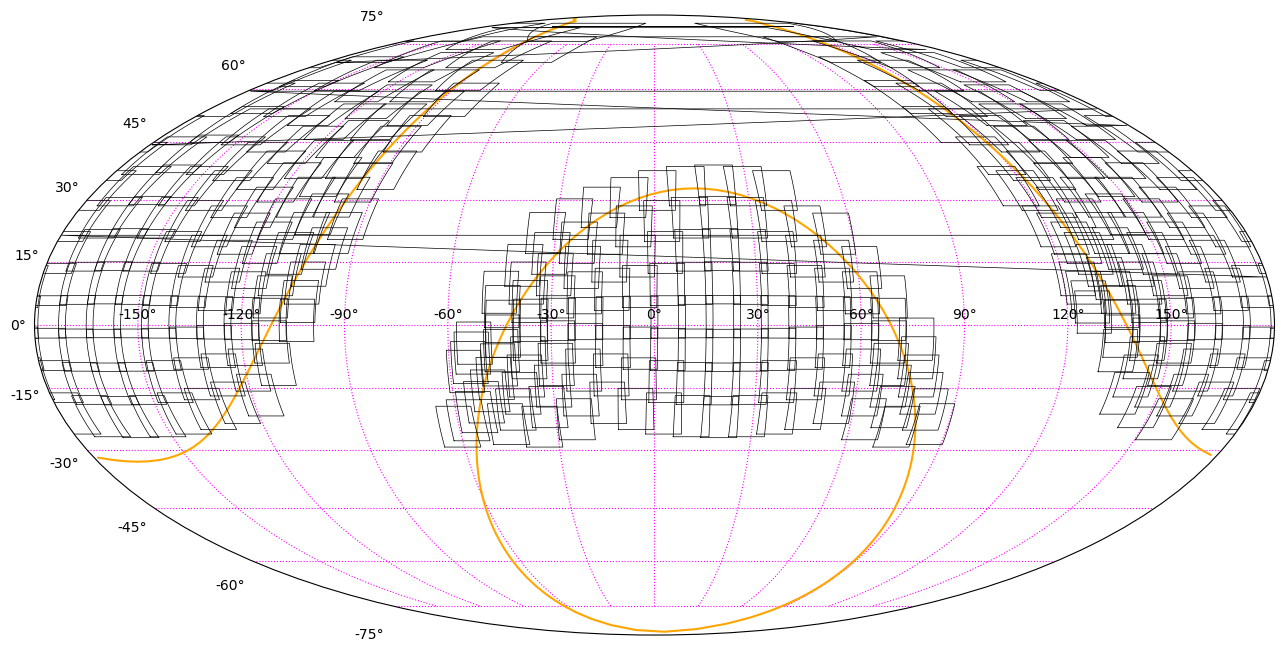

In [7]:
visualizer.mollweide(grid, b_lim=np.radians(30), outlines=True);

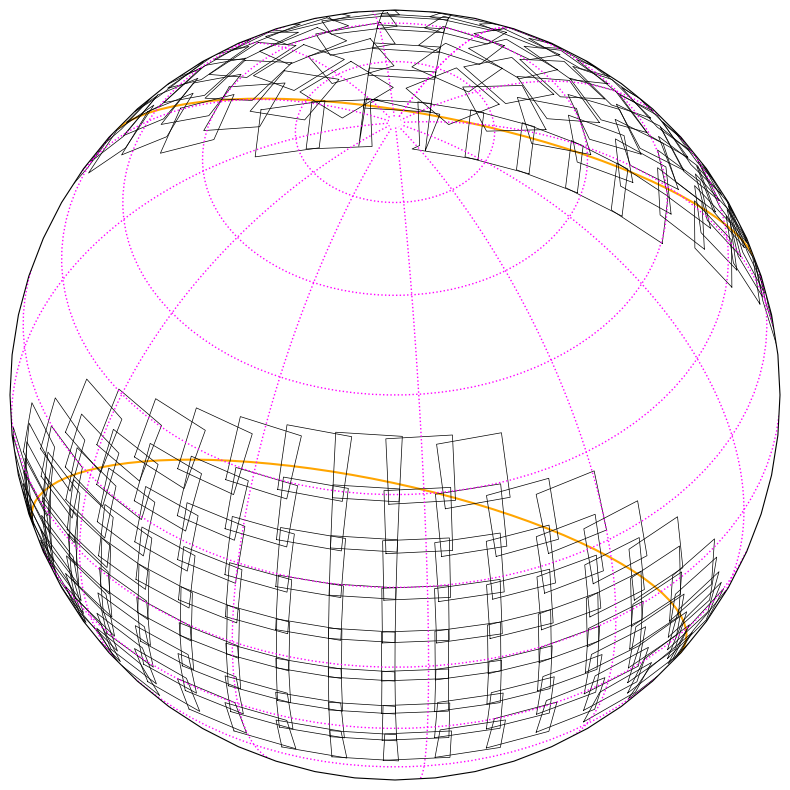

In [8]:
visualizer.orthographic(grid, b_lim=np.radians(30), outlines=True);

**Issues:**

1. There still is a lot of redundant overlap close to the tilted poles of the grid.
2. There are gaps near the true poles.

### Pasiphae Northern grid

In [9]:
fov = Angle(30. * u.arcmin)
overlap = Angle(2. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-25. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
frame_rot_dec = Angle(90. * u.deg)
frame_rot_ra = Angle(110. * u.deg)
verbose = 2

grid = fieldgrid.FieldGridGrtCirc(
        fov.rad, overlap=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, dec_lim_south=dec_lim_south.rad,
        gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        frame_rot_ra=frame_rot_ra.rad, frame_rot_dec=frame_rot_dec.rad, verbose=verbose)

Create fields..
  Calculate field centers..
    Number of RA half circles: 772
    Number of declinations: 386
    Rotate frame by 90.0 deg in declination
    Rotate frame by 110.0 deg in RA
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
    Galactic latitude limit: +/-30.0 deg
    Application: field corners
    Fields removed:   185650
    Fields remaining: 112342
  Apply declination limits..
    Dec. lim. North: none
    Dec. lim. South: -25.0
    Fields removed:    26601
    Fields remaining:  85741
Final number of fields: 85741


#### Show

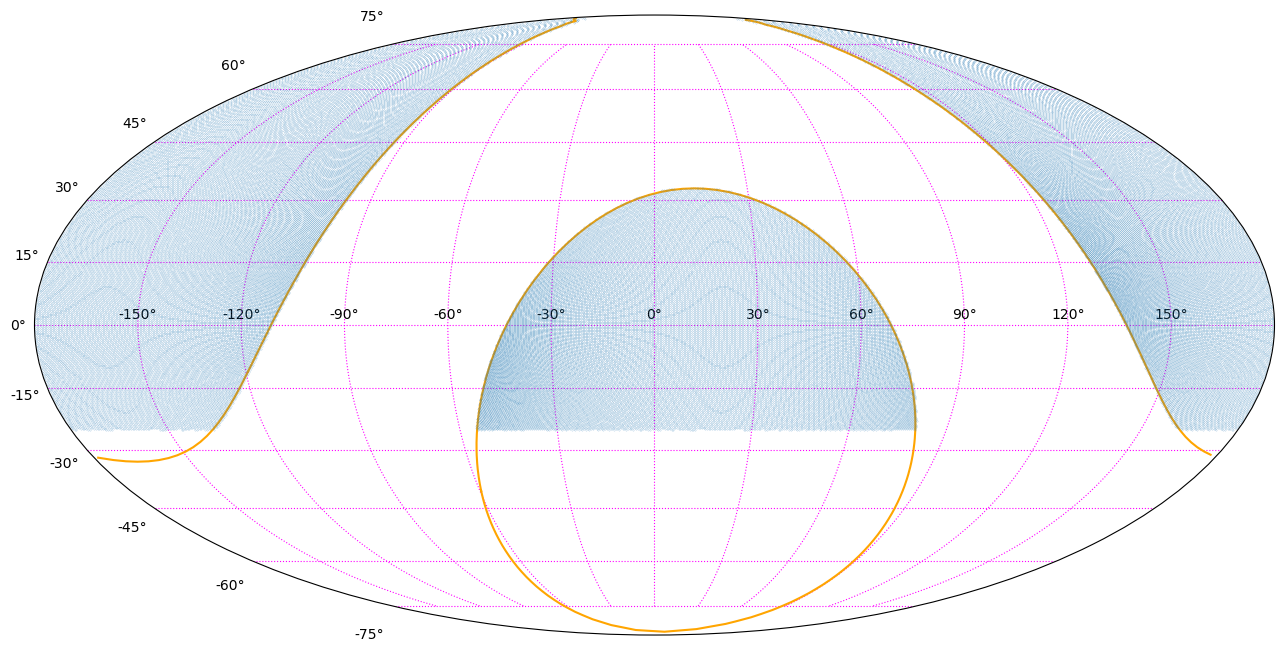

In [10]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

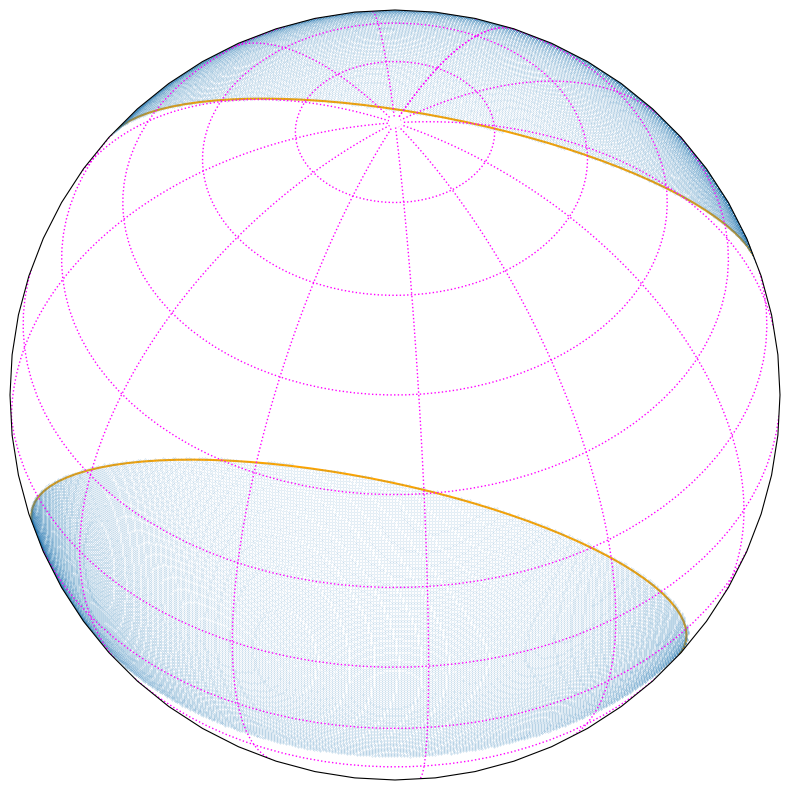

In [11]:
visualizer.orthographic(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

#### Run tests with spherical sampler

In [12]:
load = True
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: tilted great circle grid
Fields: 85741
Test points: 100000

In [13]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [14]:
load = True
sampler='radec'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: tilted great circle grid
Fields: 85741
Test points: 100000

In [15]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [16]:
sampler='radec'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [17]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 1826


##### Where are gaps located?

In [18]:
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [19]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


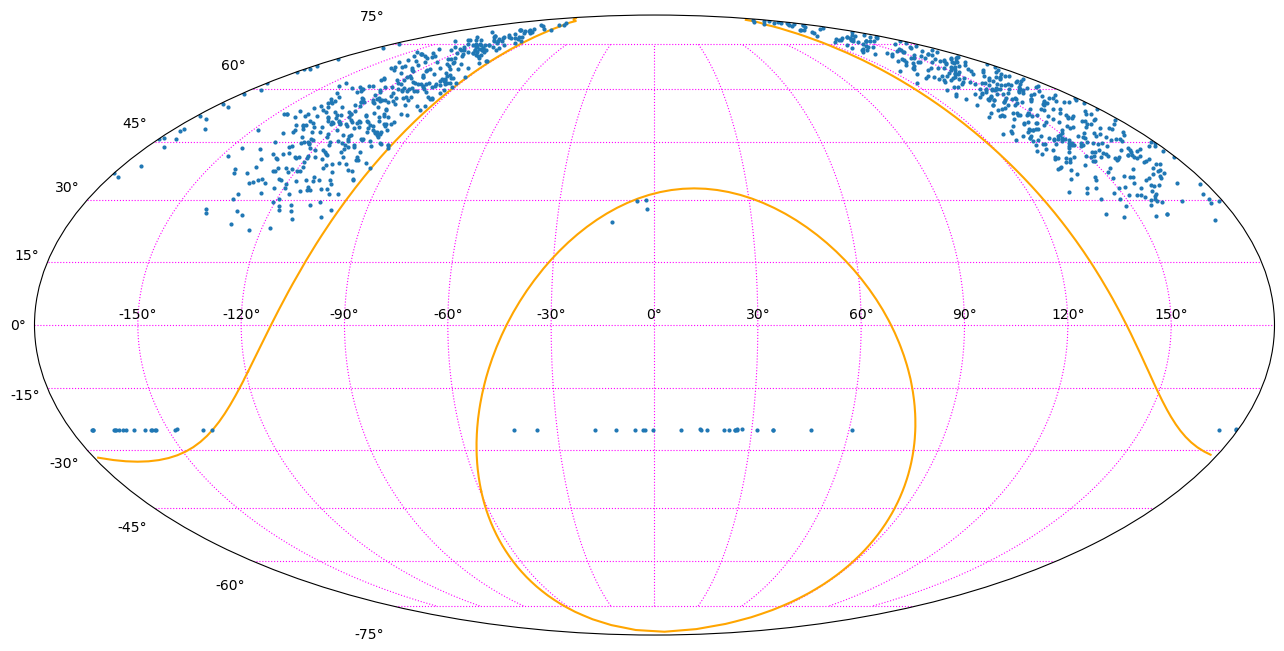

In [20]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

#### Test for overlap

In [21]:
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [22]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 1.0e-02
Sky fraction with single field:        64.3 %
Sky fraction with overlapping fields:  34.6 %



region  n_points  fraction
0                  gaps      1043   0.01043
1          single field     64340   0.64340
2  2 fields overlapping     32038   0.32038
3  3 fields overlapping      2318   0.02318
4  4 fields overlapping       259   0.00259

#### Where are overlaping areas located?

In [23]:
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [24]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


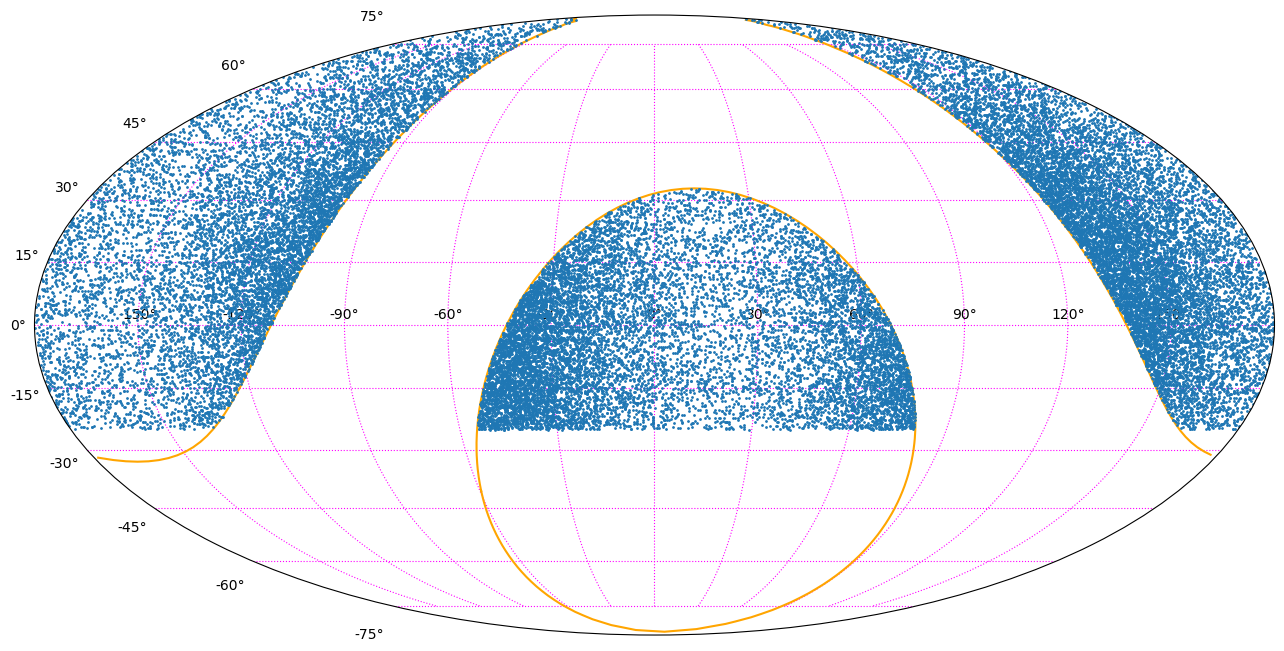

In [25]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [26]:
sampler='radec'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [27]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(-25, 90.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

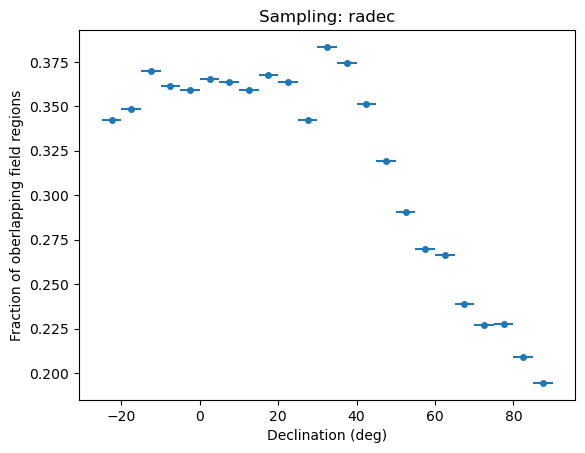

In [28]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

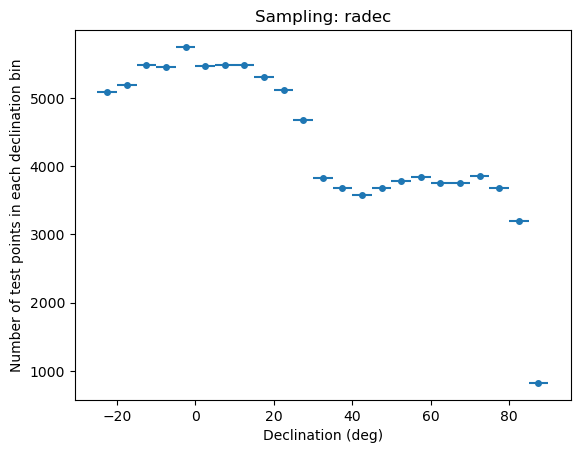

In [29]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

## Isolatitudinal grid

### Demonstration

In [30]:
fov = Angle(10. * u.deg)
overlap = Angle(2. * u.deg)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(0. * u.deg)
gal_lat_lim_strict = True
verbose = 2

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, dec_lim_south=dec_lim_south.rad,
        gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, verbose=verbose)

Create fields..
  Calculate field centers..
    Number of declination circles: 23
    Dec: -88.00 deg. Closing gaps. Number of fields:      6
    Dec: -80.00 deg. Closing gaps. Number of fields:     10
    Dec: -72.00 deg. Closing gaps. Number of fields:     15
    Dec: -64.00 deg. Number of fields:     19
    Dec: -56.00 deg. Number of fields:     25
    Dec: -48.00 deg. Number of fields:     30
    Dec: -40.00 deg. Number of fields:     34
    Dec: -32.00 deg. Number of fields:     38
    Dec: -24.00 deg. Number of fields:     41
    Dec: -16.00 deg. Number of fields:     43
    Dec:  -8.00 deg. Number of fields:     44
    Dec:  -0.00 deg. Number of fields:     45
    Dec:  +8.00 deg. Number of fields:     44
    Dec: +16.00 deg. Number of fields:     43
    Dec: +24.00 deg. Number of fields:     41
    Dec: +32.00 deg. Number of fields:     38
    Dec: +40.00 deg. Number of fields:     34
    Dec: +48.00 deg. Number of fields:     30
    Dec: +56.00 deg. Number of fields:     25
  

In [31]:
visualizer = vis.FieldGridVisualizer()

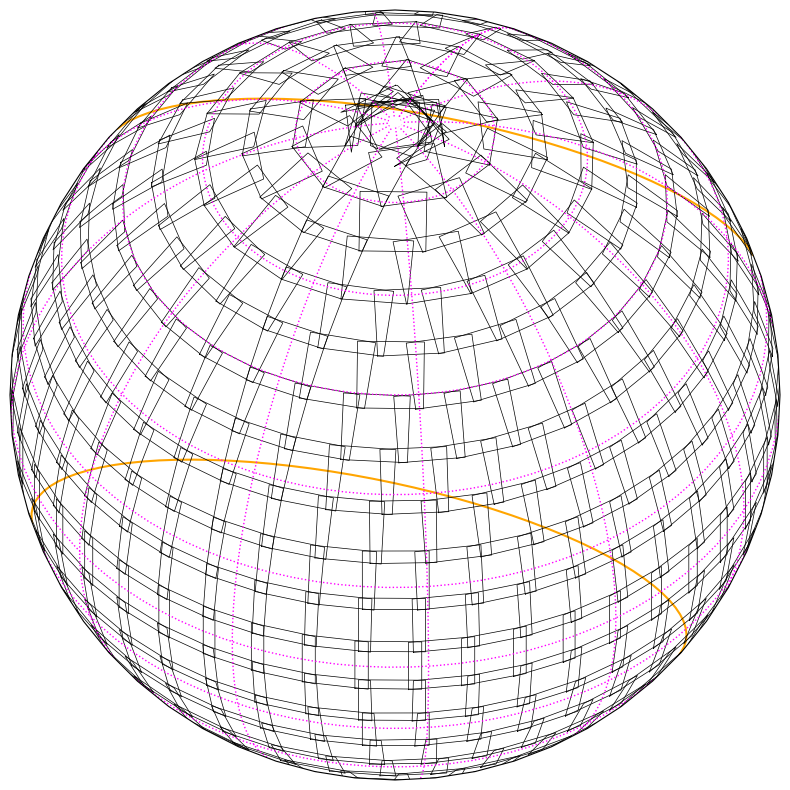

In [32]:
visualizer.orthographic(grid, b_lim=np.radians(30), outlines=True);

### Pasiphae Northern grid

In [33]:
fov = Angle(30. * u.arcmin)
overlap = Angle(2. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-25. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, dec_lim_south=dec_lim_south.rad,
        gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 72092


#### Show

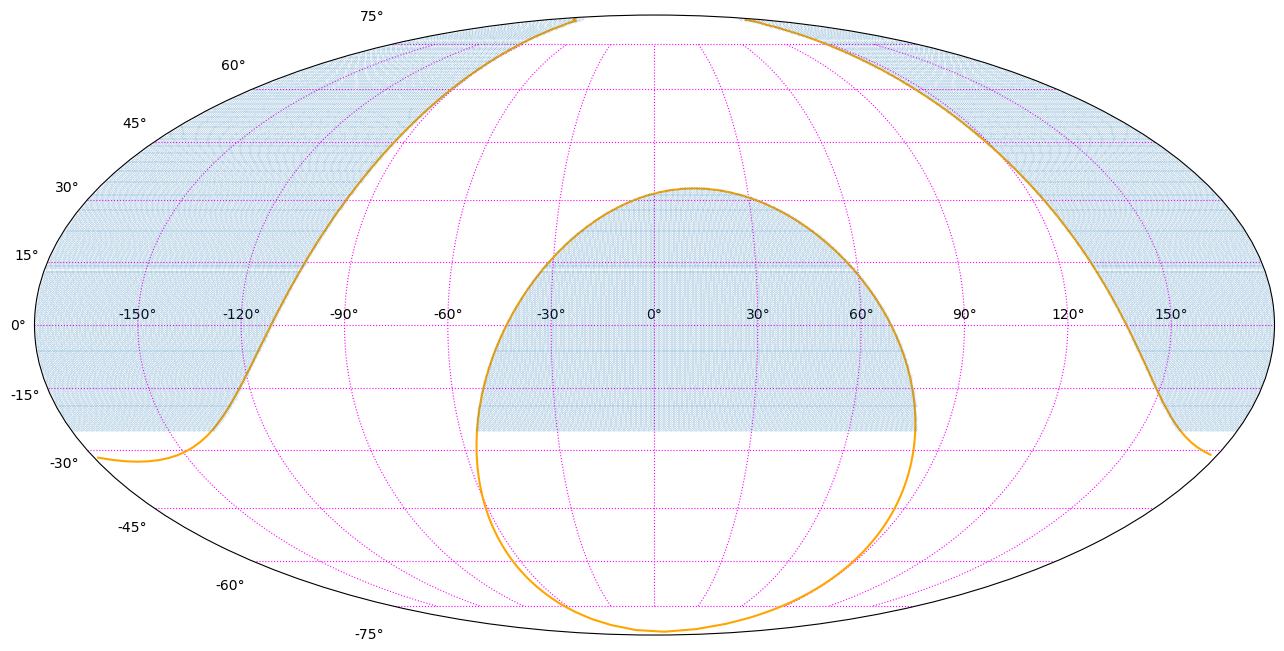

In [34]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

#### Run tests with spherical sampler

In [35]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 72092
Test points: 100000

In [36]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [37]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 72092
Test points: 100000

In [38]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [39]:
sampler='radec'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [40]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [41]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [42]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [43]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [44]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [45]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:        86.1 %
Sky fraction with overlapping fields:  13.9 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field     86134   0.86134
2  2 fields overlapping     12943   0.12943
3  3 fields overlapping       787   0.00787

#### Where are overlaping areas located?

In [46]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [47]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


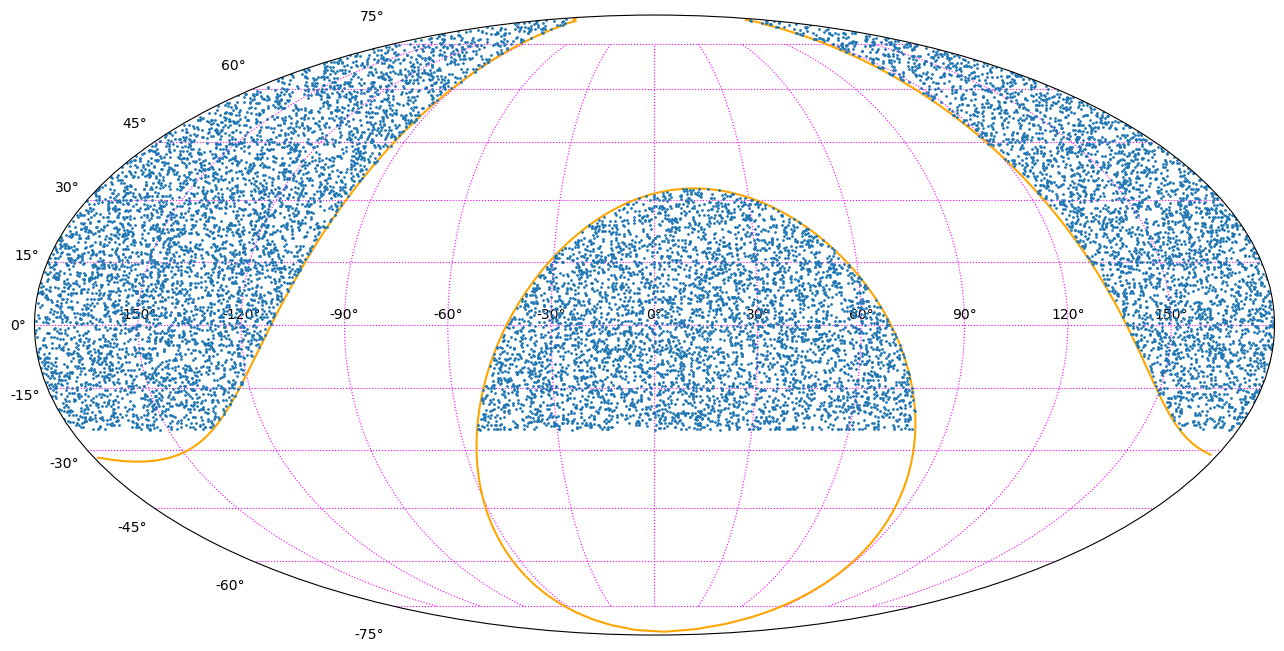

In [48]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [49]:
sampler='radec'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [50]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(-25, 90.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

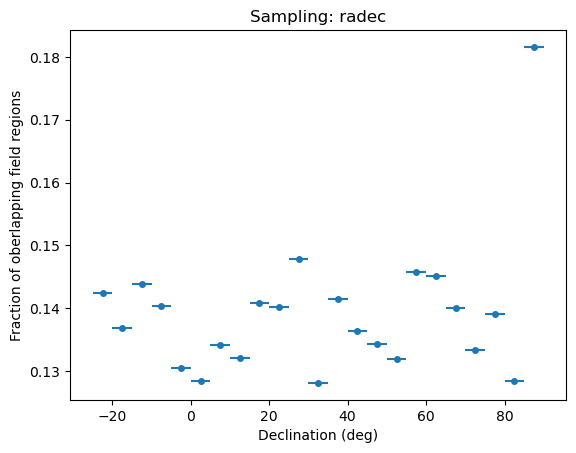

In [51]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

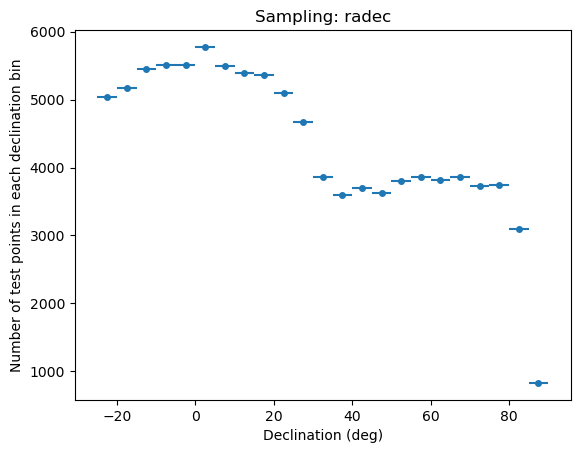

In [52]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

### Pasiphae Southern grid

In [53]:
fov = Angle(35. * u.arcmin)
overlap = Angle(2. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(28. * u.deg)
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, dec_lim_south=dec_lim_south.rad,
        gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 53684


#### Show

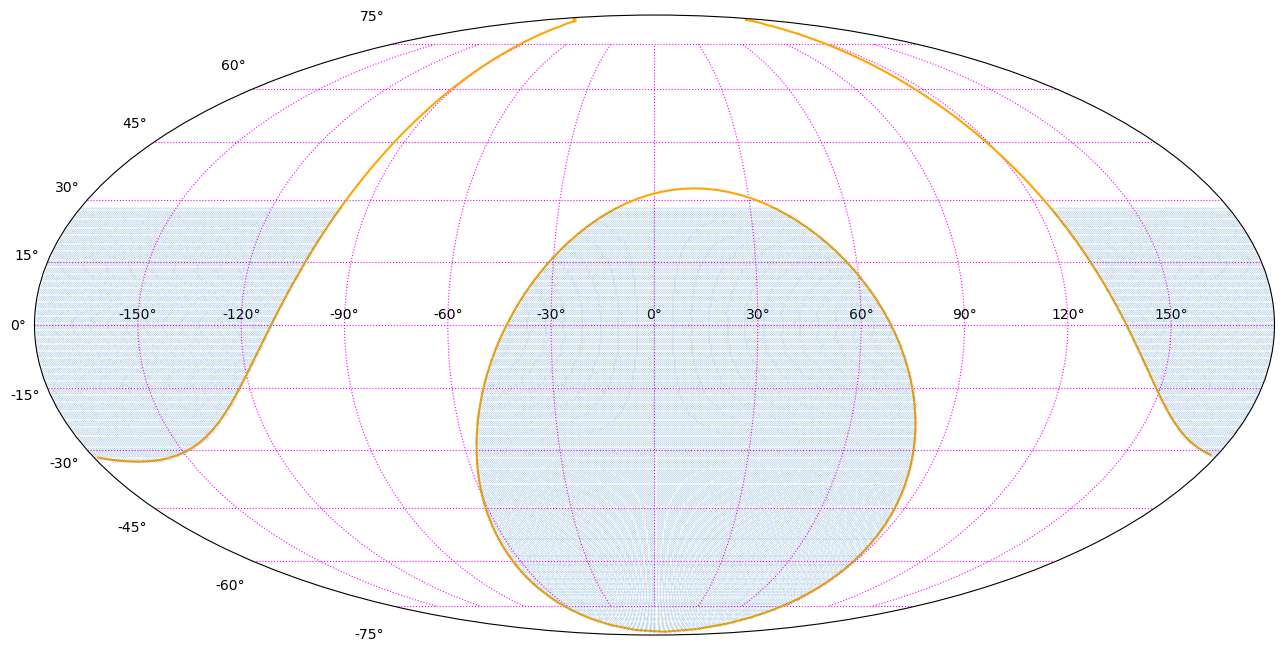

In [54]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

#### Run tests with spherical sampler

In [55]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 53684
Test points: 100000

In [56]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [57]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 53684
Test points: 100000

In [58]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [59]:
sampler='radec'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [60]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [61]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [62]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [63]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [64]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [65]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:        88.1 %
Sky fraction with overlapping fields:  11.9 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field     88105   0.88105
2  2 fields overlapping     11228   0.11228
3  3 fields overlapping       582   0.00582

#### Where are overlaping areas located?

In [66]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [67]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


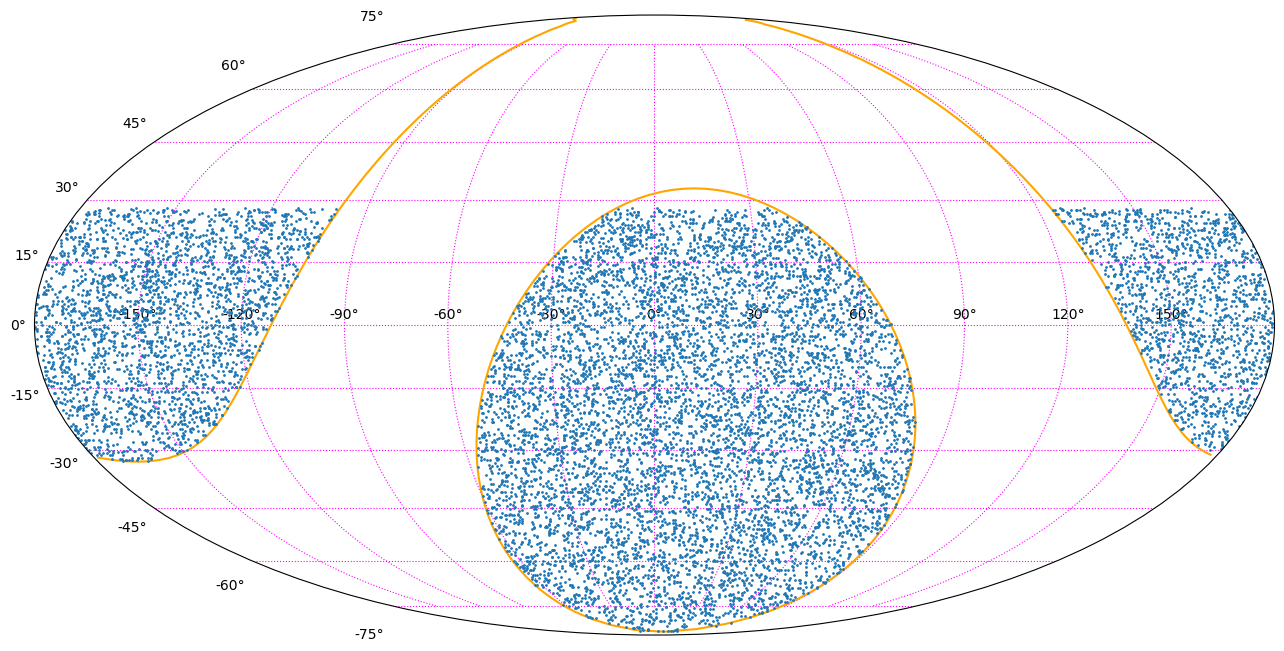

In [68]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [69]:
sampler='radec'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [70]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(-90, 28.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

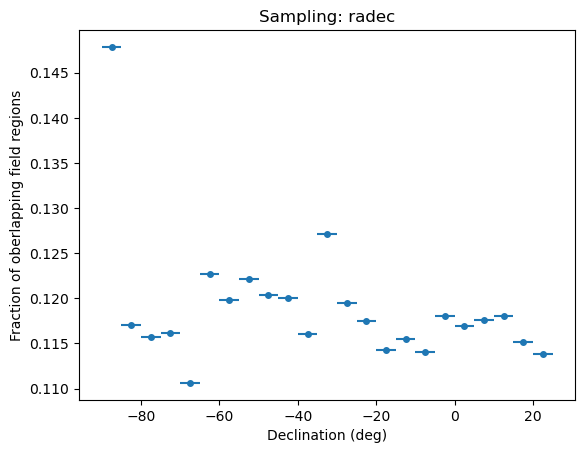

In [71]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

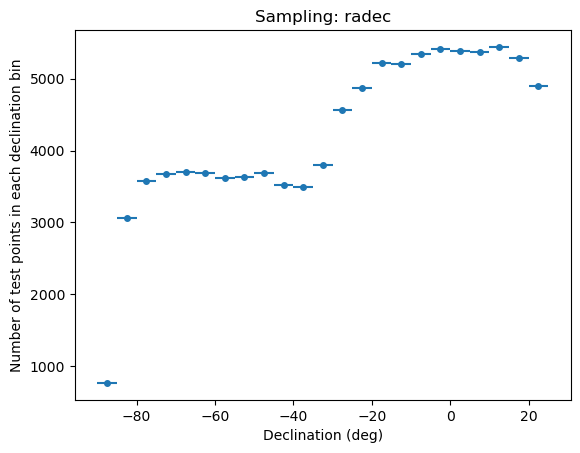

In [72]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');